Import Libraries


In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

Download and Load Dataset

In [48]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/ahmad/Desktop/housing.csv")

# Display the first 5 rows
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Data Preprocessing

In [49]:
# Drop rows with missing values
df.dropna(inplace=True)

# Handle categorical columns (e.g., 'ocean_proximity') using one-hot encoding
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Define input features (X) and target (y)
X = df.drop(columns=["median_house_value"])
y = (df["median_house_value"] > df["median_house_value"].median()).astype(int)

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20433, 12)
Shape of y: (20433,)


In [60]:
print(X.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity_INLAND  \
0       322.0       126.0         8.3252                   False   
1      2401.0      1138.0         8.3014                   False   
2       496.0       177.0         7.2574                   False   
3       558.0       219.0         5.6431                   False   
4       565.0       259.0         3.8462                   False   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                      True   
1                   False     

Generate Polynomial Features

In [50]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature Scaling

In [51]:
# Generate polynomial features of degree 2
degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X_scaled)

Initialize Model Parameters

In [52]:
# Initialize weights (theta) to zeros
m, n = X_poly.shape
theta = np.zeros(n)

# Display the shape of theta
print("Shape of theta:", theta.shape)

Shape of theta: (91,)


Define Helper Functions

In [53]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta -= (alpha / m) * X.T @ (sigmoid(X @ theta) - y)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

Train the Model

In [54]:
#hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000

# Train the model using gradient descent
theta, cost_history = gradient_descent(X_poly, y, theta, alpha, iterations)

print("Final cost:", cost_history[-1])

Final cost: 0.40791707757354995


Make Predictions

In [55]:
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Make predictions on the training data
y_pred = predict(X_poly, theta)

print("First 10 predictions:", y_pred[:10])

First 10 predictions: [1 1 1 1 1 1 1 1 1 1]


Evaluate Model Accuracy

In [56]:

accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.8245


The training accuracy is 82.45%, which is decent for a logistic regression model


Plot Cost History

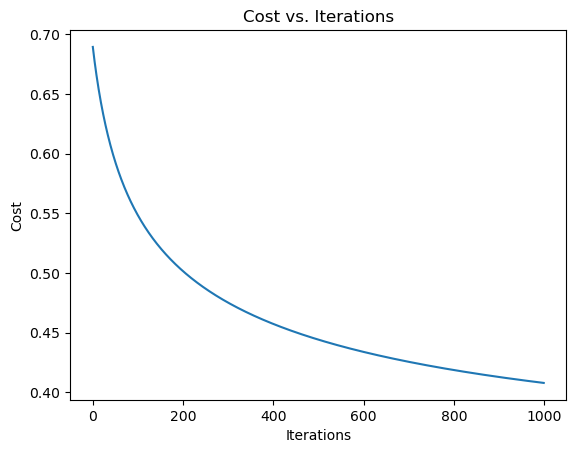

In [57]:

plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()

The cost function is steadily decreasing over the iterations, which is a good sign that gradient descent is working correctly. The curve follows a typical exponential decay shape, meaning the model is converging. However, the cost is still decreasing

In [58]:
import joblib

# Save the model and preprocessing objects
joblib.dump(theta, "model_theta.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(poly, "polynomial_features.pkl")

['polynomial_features.pkl']